In [ ]:
class PartyAnimal:
    
    #Constructor method
    def __init__(self):
        self.x = 0
        
    def party(self):
        self.x += 1
        print(f"So far: {self.x}")
        
an = PartyAnimal()

an.party()
an.party()
an.party()

So far: 1
So far: 2
So far: 3


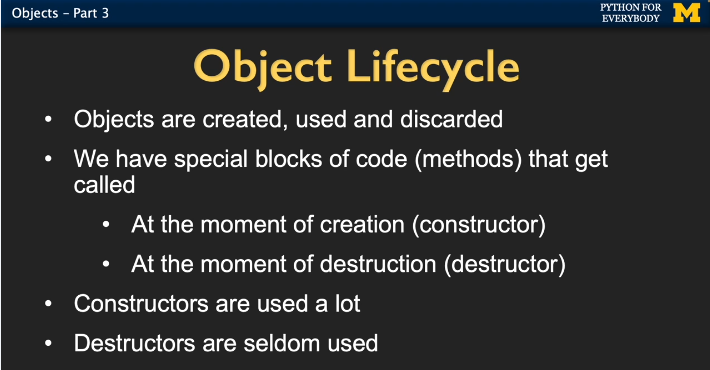

## Constructor 
THe primary purpose of the constructor is to set up some instance variables to have the proper initial values when an object is created

In [ ]:
class PartyAnimal:
    
    #Constructor method
    def __init__(self):
        self.x = 0
        
    def party(self):
        self.x += 1
        print(f"So far: {self.x}")
        
    #destructure Method
    def __del__(self):
        print("PartyAnimal object destructed")
        

an = PartyAnimal()
an.party()
an.party()

an = 42 # In this line, when python tries to reassign the an variable to an int, the previous object stored there gets deleted. 
print(f"An contains: {an}")

So far: 1
So far: 2
PartyAnimal object destructed
An contains: 42


In [5]:
class StudentList:
    
    #constructor
    def __init__(self,name):
        self.name = name
        self.x = 0
        print(f"{self.name} Student constructed")
        
    def party(self):
        self.x += 1
        print(f"So far {self.x} parties")

a = StudentList("Andres")
a.party()

mp = StudentList("Maria Paula")
mp.party()
        

Andres Student constructed
So far 1 parties
Maria Paula Student constructed
So far 1 parties


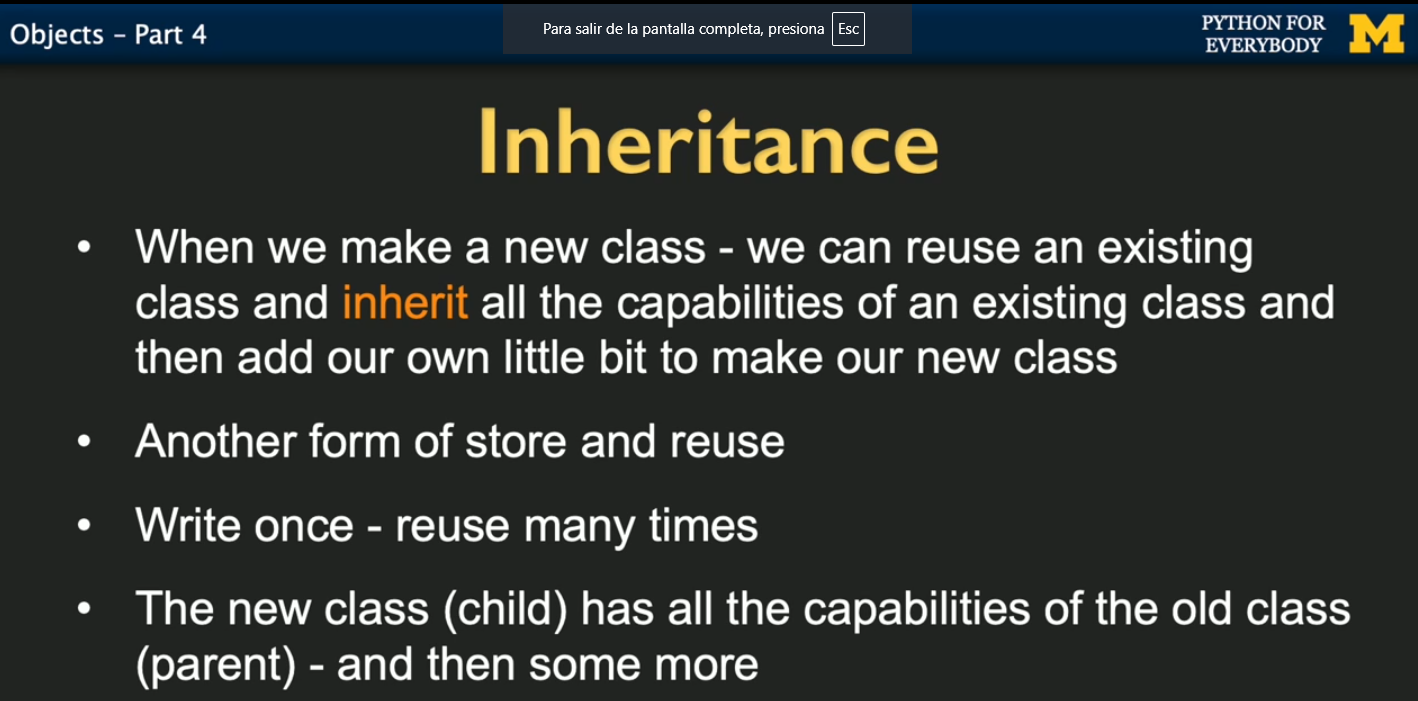

## Terminology: *Inheritance*

'Subclasses' are more specialized versions of a class, which inherit attributes and behaviors from their partent classes, and can introduce their own. 

In [ ]:
class Person:
    
    def __init__(self, name):
        self.name = name
        self.x = 0
        
    def party(self):
        self.x += 1
        print(f"Party count {self.x} by {self.name} ")
        
class Student(Person):
    
    def __init__(self,nam):
        super().__init__(nam)
        self.points = 0
        
    def touchDown(self):
        self.points += 7
        self.party()
        print(f"{self.name} points {self.points}")
    
st1 = Student("Andres")

st1.party()
st1.touchDown()
st1.touchDown()

print(dir(st1))

Party count 1 by Andres 
Party count 2 by Andres 
Andres points 7
Party count 3 by Andres 
Andres points 14
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'name', 'party', 'points', 'touchDown', 'x']


***
# Relational DataBases

## Database Introduction: Basic Structured Query Language

## Database Model
A Database model or Database schema is the structure or format of a database, described in a formal language supported by the database management system. 

### Insert Statment

INSERT INTO table_name ('column_1','column_2','column_n') VALUES ('value_c1','value_c2','value_cn')

### Delete Statement

DELETE FORM table_name WHERE condition_1

*When Using the delete statement is critical to add a where clause, otherwise will delete all records on that table. 

### Update Statement

UPDATE table_name
SET 'column_name' = 'New_value'
WHERE condition_1

### Select Statement

SELECT column_1, column_2, column_n
FORM table_name
WHERE condition_1

In [ ]:
import sqlite3

conn = sqlite3.connect('./DB/sql1.db')
cur= conn.cursor()

cur.execute('DROP TABLE IF EXISTS Counts_Org')
cur.execute('CREATE TABLE Counts_Org (email TEXT, count INTEGER)')

f_name = input('Enter file name: ')
f_path = f'../Course_python_code/code3/{f_name}'

try: 
    f_open = open(f_path)
except:
    f_open = None
    print("File not found")

if f_open is not None:
    
    for line in f_open:
        line = line.strip().lower()
        
        if line.startswith('from: '):
            line = line.split()
            email = line[1]            
            
            q = cur.execute('SELECT * FROM Counts_Org WHERE email = ?',(email,))
            
            if q.fetchone() is None:
                cur.execute('INSERT INTO Counts_Org (email, count) VALUES (?,1)',(email,))
            else: 
                cur.execute('UPDATE Counts_Org SET count = count + 1 WHERE email = ?', (email,))
        

final_q = cur.execute('SELECT * FROM Counts_Org ORDER BY count DESC;')

for email,cnt in final_q.fetchall(): print(email,cnt)


cur.close()
conn.commit()
conn.close()

uct.ac.za
media.berkeley.edu
umich.edu
iupui.edu
umich.edu
iupui.edu
iupui.edu
iupui.edu
umich.edu
umich.edu
umich.edu
umich.edu
iupui.edu
umich.edu
caret.cam.ac.uk
gmail.com
uct.ac.za
uct.ac.za
uct.ac.za
uct.ac.za
uct.ac.za
media.berkeley.edu
media.berkeley.edu
media.berkeley.edu
iupui.edu
iupui.edu
iupui.edu


In [8]:
import sqlite3

conn = sqlite3.connect('./DB/sql1.db')
cur = conn.cursor()

initial_statement = """
DROP TABLE IF EXISTS Ages;

CREATE TABLE Ages (
    name VARCHAR(128),
    age INTEGER
);

INSERT INTO Ages (name,age) VALUES ('Taylor',17);
INSERT INTO Ages (name,age) VALUES ('Luci',13);
INSERT INTO Ages (name,age) VALUES ('Mabruka', 14);
INSERT INTO Ages (name,age) VALUES ('Raunaq',14);
INSERT INTO Ages (name,age) VALUES ('Joanna',16);
INSERT INTO Ages (name,age) VALUES ('Keryn',34);
"""

cur.executescript(initial_statement)

select_q = cur.execute('SELECT * FROM Ages ORDER BY age DESC;')
for person, age in select_q.fetchall(): print(person,age)

assigment_q = cur.execute('SELECT hex(name || age) AS X FROM Ages ORDER BY X;')
print(assigment_q.fetchone())

cur.close()
conn.close()

Keryn 34
Taylor 17
Joanna 16
Mabruka 14
Raunaq 14
Luci 13
('4A6F616E6E613136',)


In [13]:
# Counting Organizations 
# This application will read the mailbox data (mbox.txt) and count the number of email messages per organization 
# (i.e. domain name of the email address) using a database with the following schema to maintain the counts.

import sqlite3

conn = sqlite3.connect('./DB/sql1.db')
cur= conn.cursor()

cur.execute('DROP TABLE IF EXISTS Counts')
cur.execute('CREATE TABLE Counts (org TEXT, count INTEGER)')

f_name = input('Enter file name: ')
f_path = f'../Course_python_code/code3/{f_name}'

try: 
    f_open = open(f_path)
except:
    f_open = None
    print("File not found")

if f_open is not None:
    
    for line in f_open:
        line = line.strip().lower()
        
        if line.startswith('from: '):
            line = line.split()
            email = line[1]
            org = email.split('@')[1]
            
            
            q = cur.execute('SELECT * FROM Counts WHERE org = ?',(org,))
            
            if q.fetchone() is None:
                cur.execute('INSERT INTO Counts (org, count) VALUES (?,1)',(org,))
            else: 
                cur.execute('UPDATE Counts SET count = count + 1 WHERE org = ?', (org,))
        

final_q = cur.execute('SELECT * FROM Counts ORDER BY count DESC LIMIT 10;')

for org,cnt in final_q.fetchall(): print(org,cnt)


cur.close()
conn.commit()
conn.close()

iupui.edu 536
umich.edu 491
indiana.edu 178
caret.cam.ac.uk 157
vt.edu 110
uct.ac.za 96
media.berkeley.edu 56
ufp.pt 28
gmail.com 25
et.gatech.edu 17


***
# Relational Databases JOINS
## Data Structure

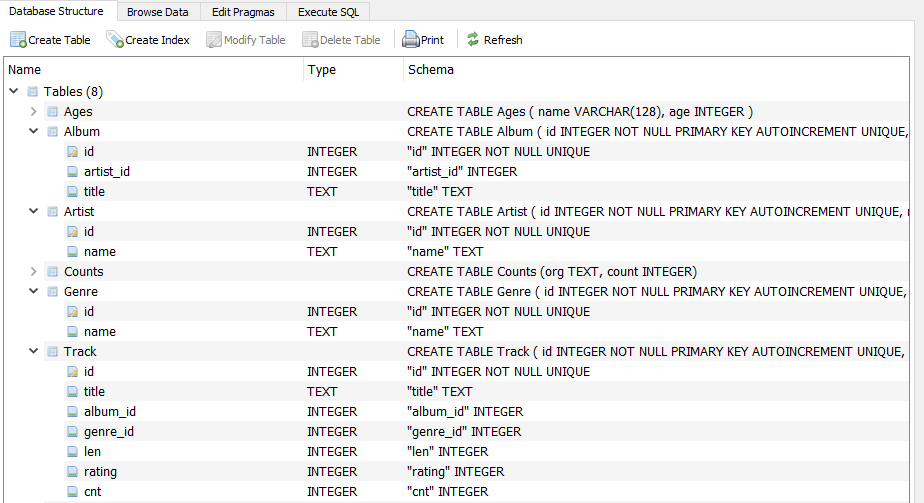

In [3]:
# Query Structure
q_statement = """
SELECT tr.title song_name, art.name autor, alb.title album_title, g.name
FROM Track tr JOIN Album alb JOIN Genre g JOIN Artist art
ON tr.album_id = alb.id AND tr.genre_id = g.id AND art.id = alb.artist_id;
"""

In [10]:
import pandas as pd

tracks_csv = pd.read_csv('../Course_python_code/code3/tracks/tracks.csv')
headers = ['Song_Name', 'Artist_Name','Albumn','len','Score','Count','Genre']
tracks_csv.columns = headers
tracks_csv.head()

,Song_Name,Artist_Name,Albumn,len,Score,Count,Genre
0,Asche Zu Asche,Rammstein,Herzeleid,79,100,231810,Industrial
1,Beauty School Dropout,Various,Grease,48,100,239960,Soundtrack
2,Black Dog,Led Zeppelin,IV,109,100,296620,Rock
3,Bring The Boys Back Home,Pink Floyd,The Wall [Disc 2],33,100,87118,Rock
4,Circles,Bryan Lee,Blues Is,54,60,355369,Funk


In [7]:
import sqlite3

conn = sqlite3.connect('./DB/tracks_exercise.db')
cur = conn.cursor()

initial_statement = """
DROP TABLE IF EXISTS Track;
DROP TABLE IF EXISTS Album;
DROP TABLE IF EXISTS Genre;
DROP TABLE IF EXISTS Artist;

CREATE TABLE Artist (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name TEXT UNIQUE 
);

CREATE TABLE Genre (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name TEXT UNIQUE
);

CREATE TABLE Album (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    artist_id INTEGER,
    title TEXT
);

CREATE TABLE Track (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    title TEXT, 
    album_id INTEGER,
    genre_id INTEGER,
    len INTEGER,
    rating INTEGER,
    count INTEGER
);
"""

cur.executescript(initial_statement)

f_name = '../Course_python_code/code3/tracks/tracks.csv'
f_open = open(f_name)

for line in f_open:
    line = line.strip().split(',')
    song, artist, albumn, count , score, long, genre = line
    
    cur.execute('INSERT OR IGNORE INTO Genre (name) VALUES (?);',(genre,))
    genre_id = cur.execute('SELECT id FROM Genre WHERE name = ?;',(genre,))
    genre_id = genre_id.fetchone()[0]
    
    cur.execute('INSERT OR IGNORE INTO Artist (name) VALUES (?)',(artist,))
    artist_id = cur.execute('SELECT id FROM Artist WHERE name = ?',(artist,))
    artist_id = artist_id.fetchone()[0]
    
    albumn_check = cur.execute('SELECT id FROM Album WHERE (artist_id = ?) AND (title = ?)',(artist_id, albumn, ))
    
    if albumn_check.fetchone() is None: 
        cur.execute('INSERT INTO Album (artist_id, title ) VALUES (?,?)',(artist_id, albumn))
        albumn_id = cur.execute('SELECT id FROM Album WHERE (artist_id = ?) AND (title = ?)',(artist_id, albumn, ))
        albumn_id = albumn_id.fetchone()[0]
    else:
        albumn_id = cur.execute('SELECT id FROM Album WHERE (artist_id = ?) AND (title = ?)',(artist_id, albumn, ))
        albumn_id = albumn_id.fetchone()[0]
    
    cur.execute('INSERT INTO Track (title,album_id,genre_id,len,rating,count) VALUES (?,?,?,?,?,?)',(song,albumn_id,genre_id,int(long),int(score),int(count),))

    
cur.close()
conn.commit()
conn.close()

***

In [25]:
import sqlite3
import json

conn = sqlite3.connect('./DB/sql_many_to_many.db')
cur = conn.cursor()

setting_db ="""
DROP TABLE IF EXISTS User;
DROP TABLE IF EXISTS Member;
DROP TABLE IF EXISTS Course;

CREATE TABLE User (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name TEXT UNIQUE
);

CREATE TABLE Course (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    title TEXT UNIQUE
);

CREATE TABLE Member (
    user_id INTERGER,
    course_id INTEGER, 
    role INTEGER, 
    PRIMARY KEY (user_id, course_id)
)"""

cur.executescript(setting_db)


f_path = '../Course_python_code/code3/roster/roster_data.json'
f_open = open(f_path).read()

users_info = json.loads(f_open)

for line in users_info:
    
    student, course, rol = line
    
    user_q = "INSERT OR IGNORE INTO User (name) VALUES (?)"
    cur.execute(user_q,(student,))
    user_id = "SELECT id FROM User WHERE name = ?"
    user_id = cur.execute(user_id,(student,)).fetchone()
    
    course_q = "INSERT OR IGNORE INTO Course (title) VALUES (?)"
    cur.execute(course_q,(course,))
    course_id = "SELECT id FROM Course WHERE title = ?"
    course_id = cur.execute(course_id,(course,)).fetchone()
    
    add_member = "INSERT OR REPLACE INTO Member (course_id, user_id,role) VALUES (?,?,?)"
    cur.execute(add_member,(course_id[0] ,user_id[0], rol, ))
   



cur.close()
conn.commit()
conn.close()
